In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasetFinal.csv')

y = df['generated_power']
X = df.drop(columns='generated_power')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import math

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", SVR(C=276.71078708,epsilon = 1, gamma = 0.28109356)),
])

svm.fit(x_train,y_train)

y_pred_svm = svm.predict(x_test)
mae_svm = mean_absolute_error(y_pred_svm, y_test)
rmse_svm = math.sqrt(mean_squared_error(y_pred_svm,y_test))
score_svm = svm.score(x_test,y_test)
print(y_pred_svm)
print('Mean Absolute Error: ', mae_svm)
print('Root Mean Squared Error: ', rmse_svm)
print('score', score_svm)

[ 2.85022374e+02  4.17969716e+03  1.42568319e+03 ...  2.48950958e+03
  1.56264204e+03 -5.61095159e-02]
Mean Absolute Error:  203.60673389440188
Root Mean Squared Error:  449.63214275158083
score 0.8967124474588659


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
mae_rf = mean_absolute_error(y_pred_rf, y_test)
rmse_rf = math.sqrt(mean_squared_error(y_pred_rf,y_test))
score_rf = rf.score(x_test,y_test)
print(y_pred_rf)
print('Mean Absolute Error: ', mae_rf)
print('Root Mean Squared Error: ', rmse_rf)
print('score', score_rf)


[ 678.35 5107.44  897.35 ... 2526.74 1762.55    0.  ]
Mean Absolute Error:  156.4873795413553
Root Mean Squared Error:  353.5038779951194
score 0.9361557702763652


In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion ="friedman_mse", max_depth=10, 
                            min_samples_split=10, random_state=5)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
mae_dt = mean_absolute_error(y_pred_dt, y_test)
rmse_dt = math.sqrt(mean_squared_error(y_pred_dt,y_test))
score_dt = dt.score(x_test,y_test)
print(y_pred_dt)
print('Mean Absolute Error: ', mae_dt)
print('Root Mean Squared Error: ', rmse_dt)
print('score', score_dt)

[ 940.         5218.88888889  809.85714286 ... 2173.89285714 2173.89285714
    0.        ]
Mean Absolute Error:  181.05208868980367
Root Mean Squared Error:  428.99701577402743
score 0.9059753275944946


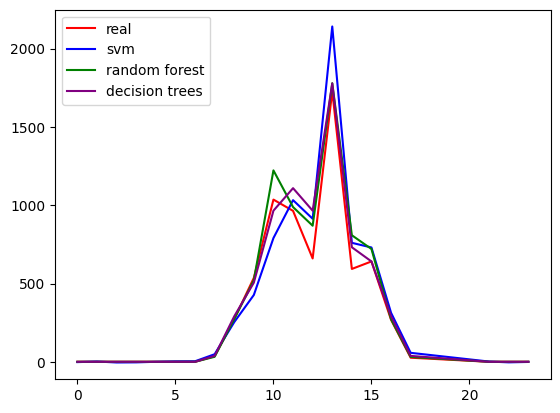

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

day = [[0,0,14,13,1021,220,3,9,95,0,0,0],
[1,0,15,14,1021,360,8,12,95,1,2,0],
[2,0,15,14,1021,271,11,17,95,0,2,0],
[3,0,15,14,1021,281,9,16,96,1,2,0],
[4,0,15,14,1021,267,4,19,96,0,3,0],
[5,0,15,14,1022,314,6,12,96,0,3,0],
[6,0,14,14,1022,232,8,14,96,0,3,0],
[7,36,14,13,1023,346,6,19,96,0,3,5],
[8,272,14,13,1024,327,9,12,96,0,3,44],
[9,536,14,14,1024,13,6,14,96,0,3,84],
[10,1036,15,15,1024,343,12,19,96,0,3,148],
[11,964,15,14,1024,319,0,12,94,0,3,171],
[12,660,16,15,1024,263,4,14,91,0,3,139],
[13,1729,16,15,1024,279,11,14,88,0,3,346],
[14,593,16,14,1024,336,6,14,88,0,3,121],
[15,641,15,14,1024,335,8,11,89,0,3,120],
[16,268,15,13,1025,340,6,14,88,0,3,51],
[17,26,14,13,1025,347,8,12,90,0,3,5],
[21,0,13,12,1026,332,8,8,93,0,3,0],
[22,0,13,12,1026,324,1,4,93,0,3,0],
[23,0,13,12,1026,345,1,1,94,0,3,0]]

df = pd.DataFrame(day, columns = ['hour','generated_power','temperatureC','dewpointC','pressurehPa','wind_direction_degrees','wind_speed_KMH','wind_speed_gustKMH','Humidity','hourly_precipMM','daily_rainMM','solar_radiation_Watts_m2']) 

y = df['generated_power']
X = df.drop(columns='generated_power')
x = df['hour']

plt.plot(x, y, color="red", label = "real")
y_pred_svm = svm.predict(X)
plt.plot(x, y_pred_svm, color="blue", label = "svm")
y_pred_rf = rf.predict(X)
plt.plot(x, y_pred_rf, color="green", label = "random forest")
y_pred_dt = dt.predict(X)
plt.plot(x, y_pred_dt, color="purple", label = "decision trees")
plt.legend(loc="upper left")
plt.show()

In [23]:
data = [['svm',mae_svm,rmse_svm,score_svm],
['rf',mae_rf,rmse_rf,score_rf],
['dt',mae_dt,rmse_dt,score_dt]]

pd.DataFrame(data, columns = ["name", "mae", "rmse", "score"])

,name,mae,rmse,score
0,svm,203.606734,449.632143,0.896712
1,rf,156.487380,353.503878,0.936156
2,dt,181.052089,428.997016,0.905975
